In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

%matplotlib inline

In [3]:
# Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")

In [4]:
ama.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [5]:
ama.isnull().sum(axis = 0)

Title           0
Author          1
List Price      1
Amazon Price    0
Hard/ Paper     0
NumPages        2
Publisher       1
Pub year        1
ISBN-10         0
Height          4
Width           5
Thick           1
Weight (oz)     9
dtype: int64

In [6]:
ama = ama.dropna()

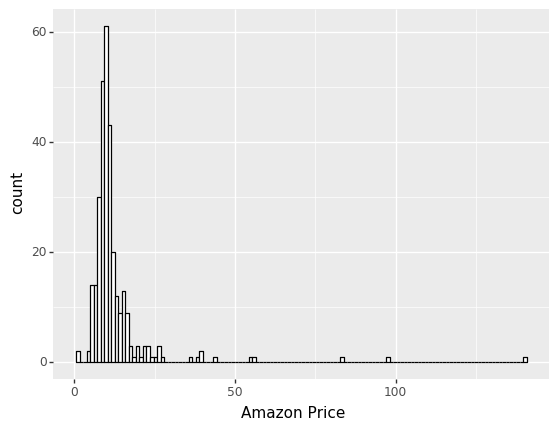

<ggplot: (301347825)>

In [8]:
# EXplore

(ggplot(ama, aes("Amazon Price")) + geom_histogram(fill = "white", color = "black"))

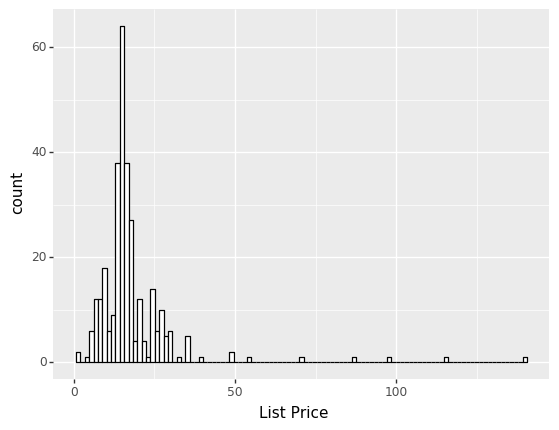

<ggplot: (301439257)>

In [9]:
(ggplot(ama, aes("List Price")) + geom_histogram(fill = "white", color = "black"))

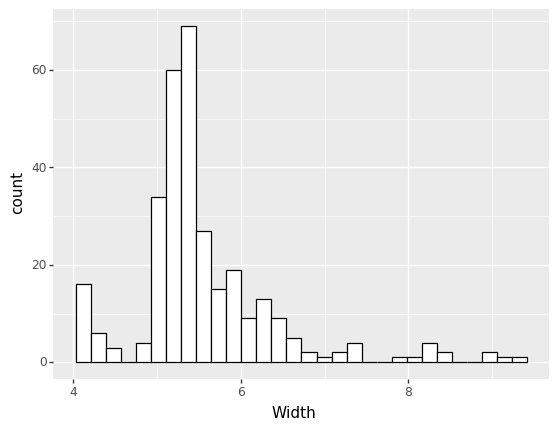

<ggplot: (303759821)>

In [10]:
(ggplot(ama, aes("Width")) + geom_histogram(fill = "white", color = "black"))

In [11]:
#MODEL

predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]
X = ama[predictors]

Y = ama["Amazon Price"]

In [12]:
zScore = StandardScaler()
zScore.fit(X)
Xz = zScore.transform(X)

In [13]:
LR = LinearRegression()

In [14]:
LR.fit(Xz,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Model Evaluate
price_pred = LR.predict(Xz)

price_pred[1:10]

array([10.91587503,  0.64596322,  7.87491152, 21.75388566, 18.09350432,
       13.26001981, 10.59729274, 21.43797602,  9.48174291])

In [17]:
mean_squared_error(Y, price_pred)

10.61233860175146

In [19]:
LR.score(Xz,Y)

0.9205886088486431

In [21]:
coefficients = pd.DataFrame({"Coef": LR.coef_, "Name": predictors})
coefficients = coefficients.append({"Coef": LR.intercept_, "Name" : "Intercept"}, ignore_index = True)

In [22]:
coefficients

,Coef,Name
0,11.401887,List Price
1,0.231519,NumPages
2,-0.419686,Weight (oz)
3,-1.159632,Thick
4,-0.098886,Height
5,-0.197179,Width
6,12.587645,Intercept


In [26]:
newBook = np.array([12.45, 300, 10,0.8,8,5]).reshape(1,-1)
newBook
newBookz = zScore.transform(newBook) #zscore
newBookz

array([[-0.41343253, -0.19260029, -0.36718493, -0.25354952, -0.15097461,
        -0.65582302]])

In [27]:
LR.predict(newBookz)

array([8.42151431])

In [28]:
newBook_inter = np.append(newBookz, 1)
newBook_inter

array([-0.41343253, -0.19260029, -0.36718493, -0.25354952, -0.15097461,
       -0.65582302,  1.        ])

In [32]:
coef = np.array(coefficients["Coef"])
np.sum(newBook_inter*coef)

8.421514307944573

In [33]:
#BEY
b = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Beyonce_data.csv")
b.head()

,Unnamed: 0,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,...,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
0,1,Beyoncé,6vWDO969PvNqNYHIOW5v0m,552zi1M53PQAX5OH4FIdTx,album,2019-07-19,2019,day,0.386,0.28800,...,balance (mufasa interlude),https://p.scdn.co/mp3-preview/de667c8595dfcf5a...,1,track,spotify:track:1RMvRv1tAvWXgYdH8DUdLX,https://open.spotify.com/track/1RMvRv1tAvWXgYd...,The Lion King: The Gift,C#,major,C# major
1,2,Beyoncé,6vWDO969PvNqNYHIOW5v0m,552zi1M53PQAX5OH4FIdTx,album,2019-07-19,2019,day,0.484,0.36300,...,BIGGER,https://p.scdn.co/mp3-preview/4a32106cb59a64f2...,2,track,spotify:track:4R2KJOgEUP2qO3re9BwIhs,https://open.spotify.com/track/4R2KJOgEUP2qO3r...,The Lion King: The Gift,F,minor,F minor
2,3,Beyoncé,6vWDO969PvNqNYHIOW5v0m,552zi1M53PQAX5OH4FIdTx,album,2019-07-19,2019,day,0.537,0.24700,...,the stars (mufasa interlude),https://p.scdn.co/mp3-preview/93479a2826c5e5ab...,3,track,spotify:track:50QREAhIciZoAiRNtyELEh,https://open.spotify.com/track/50QREAhIciZoAiR...,The Lion King: The Gift,D,major,D major
3,4,Beyoncé,6vWDO969PvNqNYHIOW5v0m,552zi1M53PQAX5OH4FIdTx,album,2019-07-19,2019,day,0.672,0.69600,...,FIND YOUR WAY BACK,https://p.scdn.co/mp3-preview/43718dbb86460b67...,4,track,spotify:track:65kk9CAAqFI3LWBEhUwVqd,https://open.spotify.com/track/65kk9CAAqFI3LWB...,The Lion King: The Gift,E,minor,E minor
4,5,Beyoncé,6vWDO969PvNqNYHIOW5v0m,552zi1M53PQAX5OH4FIdTx,album,2019-07-19,2019,day,0.000,0.00515,...,uncle scar (scar interlude),NaN,5,track,spotify:track:4KJ3NHQvLjA0hB2nv43cxD,https://open.spotify.com/track/4KJ3NHQvLjA0hB2...,The Lion King: The Gift,A,minor,A minor


In [34]:
predictors = ["energy", "key", "loudness", "speechiness",
              "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

In [35]:
X = b[predictors]
Y = b["danceability"]

In [37]:
zScoreb = StandardScaler()
zScoreb.fit(X)
Xz = zScoreb.transform(X)

In [38]:
B_mod = LinearRegression()
B_mod.fit(Xz,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
B_mod.score(Xz,Y)

0.6048313370544811